In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
PATH = "./names/"

#Задание 1. Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

In [87]:
names_by_year = {}
for year in range (1900, 2010, 10):
    names_by_year[year]= pd.read_csv(PATH + "yob{}.txt".format(year),
                                    names = ["Name", "Gender", "Count"])
names_all = pd.concat(names_by_year, names=["Year", "Pos"])

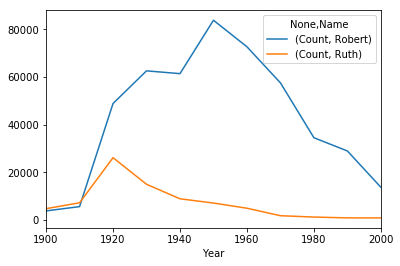

In [88]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), "Name"]).sum()
name_dynamics.query("Name == ['Ruth', 'Robert']").unstack("Name").plot()

Задание 2. Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

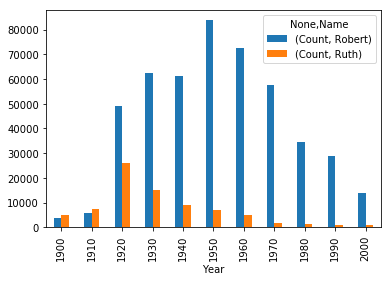

In [89]:
# Сделал с 10 летними промежутками для красоты(если нужно могу поменять на 5 лет)Спасибо
name_dynamics.query("Name == ['Ruth', 'Robert']").unstack("Name").plot.bar()

Задание 3. Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

In [90]:
data_frame = pd.read_csv(PATH + "yob1950.txt", names=["Name", "Gender", "Count"])
data_frame_new = data_frame[data_frame.Name.str.startswith('R')].groupby('Name').sum().sort_values(by='Count', axis=0, ascending=False).head(10)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1DE74050>], dtype=object)

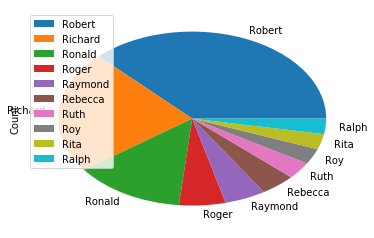

In [91]:
data_frame_new.plot.pie(subplots=True)

In [92]:
years = (1900, 2000+1)
data_frame_list = []
for year in range(*years):
    df = pd.read_csv(PATH + "yob{}.txt".format(year), names = ["Name", "Gender", "Count"])
    data_frame_list.append(df)


In [93]:
data_frames = df_list[0]
i = 0
for df in df_list[1:]:
    data_frames  = pd.merge(data_frames , df, on=['Name', 'Gender'], how='outer',
                       suffixes=('_{}'.format(1000+i), '_{}'.format(2000+i)))
    i += 1
data_frames  = data_frames .fillna(0)

In [94]:
data_frames.head(3)

,Name,Gender,Count_1000,Count_2000,Count_1002,Count_2002,Count_1004,Count_2004,Count_1006,Count_2006,...,Count_1192,Count_2192,Count_1194,Count_2194,Count_1196,Count_2196,Count_1198,Count_2198,Count_1200,Count_2200
0,Mary,F,16707.0,13136.0,14486.0,14275.0,14962.0,16067.0,16370.0,17580.0,...,8757.0,8454.0,8115.0,7750.0,7438.0,6946.0,6631.0,6434.0,6360.0,6184.0
1,Helen,F,6343.0,5247.0,5967.0,6129.0,6488.0,6811.0,7176.0,7579.0,...,773.0,827.0,868.0,848.0,837.0,900.0,812.0,832.0,841.0,890.0
2,Anna,F,6114.0,4923.0,5288.0,5098.0,5330.0,5424.0,5502.0,5575.0,...,7115.0,6845.0,6805.0,7522.0,8559.0,8554.0,8336.0,8374.0,9092.0,10581.0


In [95]:
count_list = [col for col in list(data_frames) if 'Count' in col]

data_frames['Total'] = list(map(int, data_frames[count_list[0]]))

for count in count_list[1:]:
    data_frames['Total'] += list(map(int, data_frames[count]) )

data_frames = data_frames[['Name', 'Total']].sort_values(by='Total', axis=0, ascending=False)

In [96]:
data_frames.sample(10)

,Name,Total
10011,Rogerio,996
63414,Tiree,78
45848,Bergen,348
27299,Korine,518
40574,Najla,698
53818,Jossalyn,22
50278,Obryan,386
46986,Youa,350
32418,Danessa,878
1451,Bonita,74780


In [97]:
import re
sort_glas = '[aeiouy]' 

def count_vowels(name):
    v = re.findall(sort_glas, name, re.IGNORECASE)
    return len(v)

def count_consonants(name):
    return len(name) - count_vowels(name)

In [98]:
data_frames['Cons'] = list(map(count_consonants, main_df.Name))
data_frames.sample(5)

,Name,Total,Cons
49830,Raha,56,2
69431,Irelyn,80,3
5998,Faustino,6130,4
27131,Melora,480,3
48717,Phalon,74,4


In [99]:
data_frames['Len'] = list(map(len, data_frames.Name))

In [100]:
data_frames.sample(5).sample(5)

,Name,Total,Cons,Len
22568,Jorja,1120,3,5
57682,Brieonna,158,4,8
30834,Jermone,428,4,7
37819,Dwone,32,3,5
10695,Nondus,10,4,6


In [101]:
len_data_frame = data_frames.groupby('Cons').agg('sum').Total.to_frame()

In [106]:

print(len_df)

          Total
Cons           
0          6298
1      10283368
2      96492416
3     196241330
4     170181102
5      71849258
6       8081696
7        298052
8       3555004
9          2494
10          322
11          512


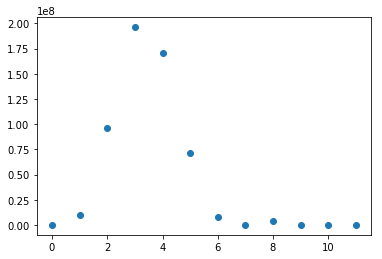

In [107]:
plt.scatter(list(len_data_frame.index.values), list(len_data_frame .Total) )